In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
import ta

In [2]:
class TrackPortfolio:
    
    def __init__(self, ticker, indicators, start_date, end_date):
        self._ticker = ticker
        self._indicators = indicators
        self._start_date = start_date
        self._end_date = end_date

    def dl_data(self):
        df = yf.download(self._ticker, 
                              start=self._start_date, 
                              end=self._end_date, 
                              progress=False)
        df = ta.add_all_ta_features(
            df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)
        all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
        df = df.reindex(all_weekdays)
        self._df = df.fillna(method='ffill')
        
    def plot_chart(self):
        fig, ax = plt.subplots(figsize=(16,9))
        for i in self._indicators:
            j = self._df.loc[:,i]
            ax.plot(j.index, j, label= i)
        ax.set_xlabel('Date')
        ax.set_ylabel(self._ticker)
        ax.legend()
        plt.show()

In [3]:
indicators_bb = ['Close', 'volatility_bbh', 'volatility_bbm', 'volatility_bbl']
indicators_ma = ['Close', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow']

In [4]:
start_date = '2015-01-01'
end_date = dt.datetime.today()

C:\Users\Daniel\Anaconda3\lib\site-packages\ta\trend.py:608: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
C:\Users\Daniel\Anaconda3\lib\site-packages\ta\trend.py:612: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])
C:\Users\Daniel\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


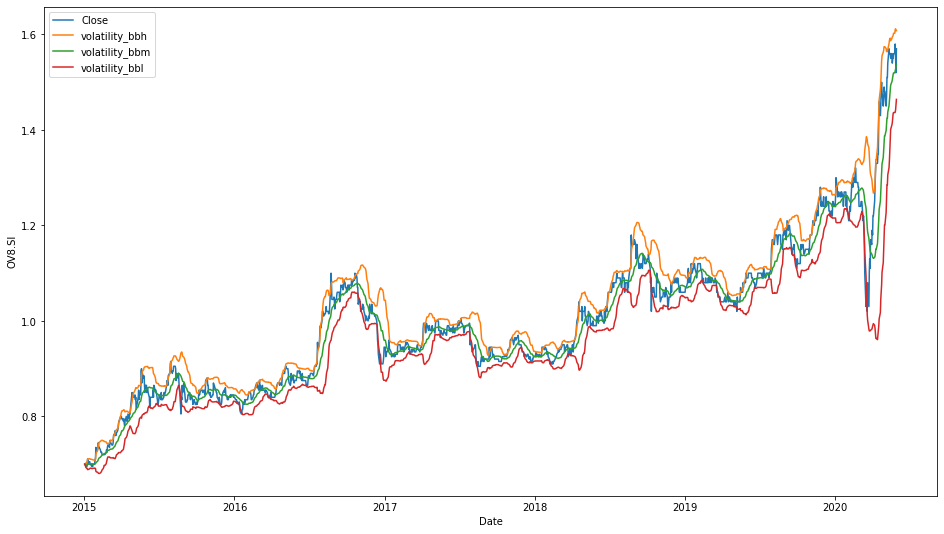

In [5]:
d05 = TrackPortfolio('OV8.SI', indicators_bb, start_date, end_date)
d05_df = d05.dl_data()
d05.plot_chart()